In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd


In [16]:
# Parameter
test_dir = "D:/kuliah/Tugas Akhir/Code/Klasifikasi Jenis Buah Lokal/dataset/hsv_dataset/test"
batch_size = 64  # Batch size
IMG_SIZE = (300, 300)
folds = 3  # Number of folds

# Import data
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 300 images belonging to 3 classes.


In [17]:
# Initialize lists to store metrics
all_test_accuracies = []
conf_matrices = []
histories = []


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 319ms/step - accuracy: 0.9772 - loss: 0.0664 - precision: 0.9772 - recall: 0.9772
Fold 1 - Test Accuracy: 0.9733333587646484
Fold 1 - Test Loss: 0.0782308280467987
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 330ms/step
              precision    recall  f1-score   support

     Manggis       1.00      1.00      1.00       100
      Pisang       0.99      0.93      0.96       100
    Rambutan       0.93      0.99      0.96       100

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



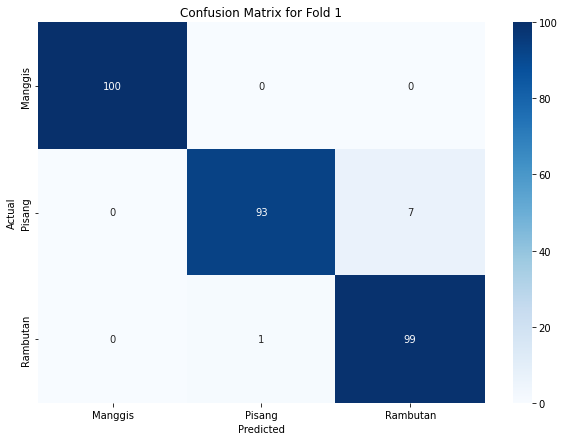

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 329ms/step - accuracy: 0.9685 - loss: 0.0759 - precision_1: 0.9748 - recall_1: 0.9685
Fold 2 - Test Accuracy: 0.9633333086967468
Fold 2 - Test Loss: 0.09225151687860489
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 342ms/step
              precision    recall  f1-score   support

     Manggis       1.00      1.00      1.00       100
      Pisang       1.00      0.89      0.94       100
    Rambutan       0.90      1.00      0.95       100

    accuracy                           0.96       300
   macro avg       0.97      0.96      0.96       300
weighted avg       0.97      0.96      0.96       300



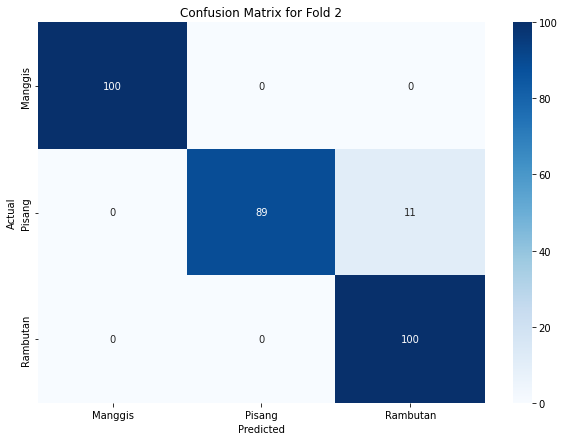

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 323ms/step - accuracy: 0.9921 - loss: 0.0400 - precision_2: 0.9921 - recall_2: 0.9895
Fold 3 - Test Accuracy: 0.9900000095367432
Fold 3 - Test Loss: 0.051261454820632935
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 348ms/step
              precision    recall  f1-score   support

     Manggis       1.00      1.00      1.00       100
      Pisang       1.00      0.97      0.98       100
    Rambutan       0.97      1.00      0.99       100

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



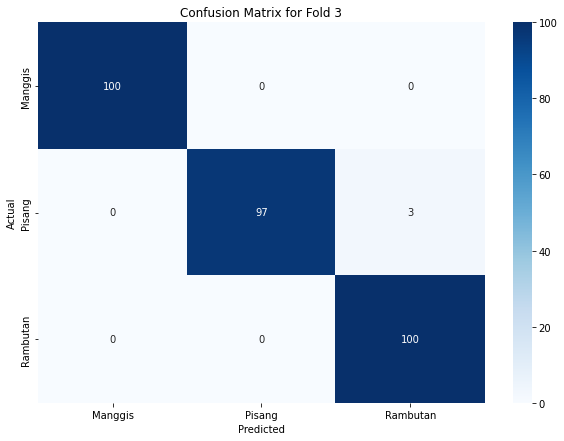

In [26]:
for fold in range(1, folds + 1):
    # Load model
    model_path = f"D:/kuliah/Tugas Akhir/Code/Klasifikasi Jenis Buah Lokal/models/K-Fold Cross Validation/CNN-HSV_fold_{fold}.h5"
    model = load_model(model_path)

    # Evaluate the model using the test data
    test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_generator)
    all_test_accuracies.append(test_accuracy)

    print(f"Fold {fold} - Test Accuracy: {test_accuracy}")
    print(f"Fold {fold} - Test Loss: {test_loss}")

    # Predictions
    test_generator.reset()
    predictions = model.predict(test_generator)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    conf_matrices.append(cm)

    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
    print(report)

    # Save history
    histories.append(model.history.history)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for Fold {fold}')
    plt.show()



Confusion Matrix for Fold 1:
[[100   0   0]
 [  0  93   7]
 [  0   1  99]]
     Class   TP  FN  FP   TN
0  Class 1  100   0   0  200
1  Class 2   93   7   1  199
2  Class 3   99   1   7  193


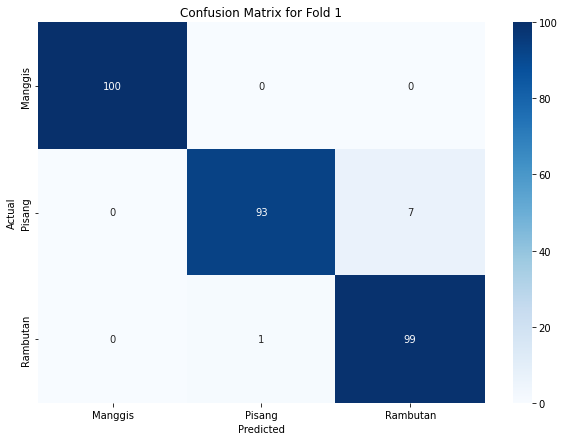


Confusion Matrix for Fold 2:
[[100   0   0]
 [  0  89  11]
 [  0   0 100]]
     Class   TP  FN  FP   TN
0  Class 1  100   0   0  200
1  Class 2   89  11   0  200
2  Class 3  100   0  11  189


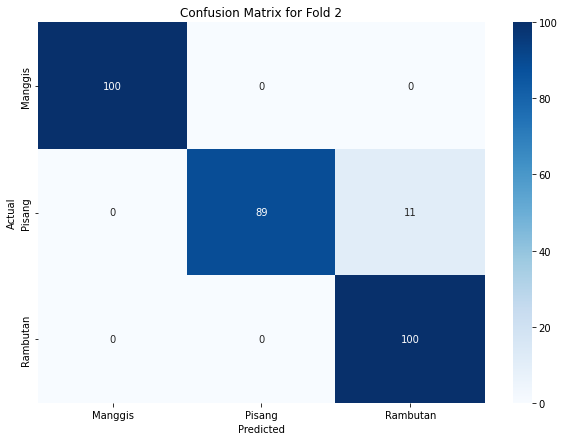


Confusion Matrix for Fold 3:
[[100   0   0]
 [  0  97   3]
 [  0   0 100]]
     Class   TP  FN  FP   TN
0  Class 1  100   0   0  200
1  Class 2   97   3   0  200
2  Class 3  100   0   3  197


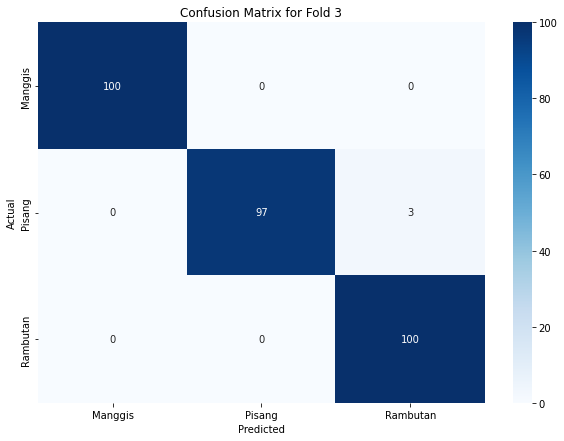

In [24]:
# Confusion matrix for each fold
for fold, cm in enumerate(conf_matrices, start=1):
    print(f"\nConfusion Matrix for Fold {fold}:\n{cm}")

    # Calculate TP, FN, FP, and TN for each class
    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    # Create a DataFrame
    results_df = pd.DataFrame({
        'Class': [f'Class {i}' for i in range(1, cm.shape[0]+1)],
        'TP': TP,
        'FN': FN,
        'FP': FP,
        'TN': TN
    })

    print(results_df)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for Fold {fold}')
    plt.show()


In [ ]:
# Confusion matrix for each fold
for fold, cm in enumerate(conf_matrices, start=1):
    print(f"\nConfusion Matrix for Fold {fold}:\n{cm}")

    # Calculate TP, FN, FP, and TN for each class
    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    # Create a DataFrame
    results_df = pd.DataFrame({
        'Class': [f'Class {i}' for i in range(1, cm.shape[0]+1)],
        'TP': TP,
        'FN': FN,
        'FP': FP,
        'TN': TN
    })

    print(results_df)
